Premières lignes du dataset:
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Valeurs manquantes par colonne:
Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

Résumé statistique:
          Variance     Skewness     Curtosis      Entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     

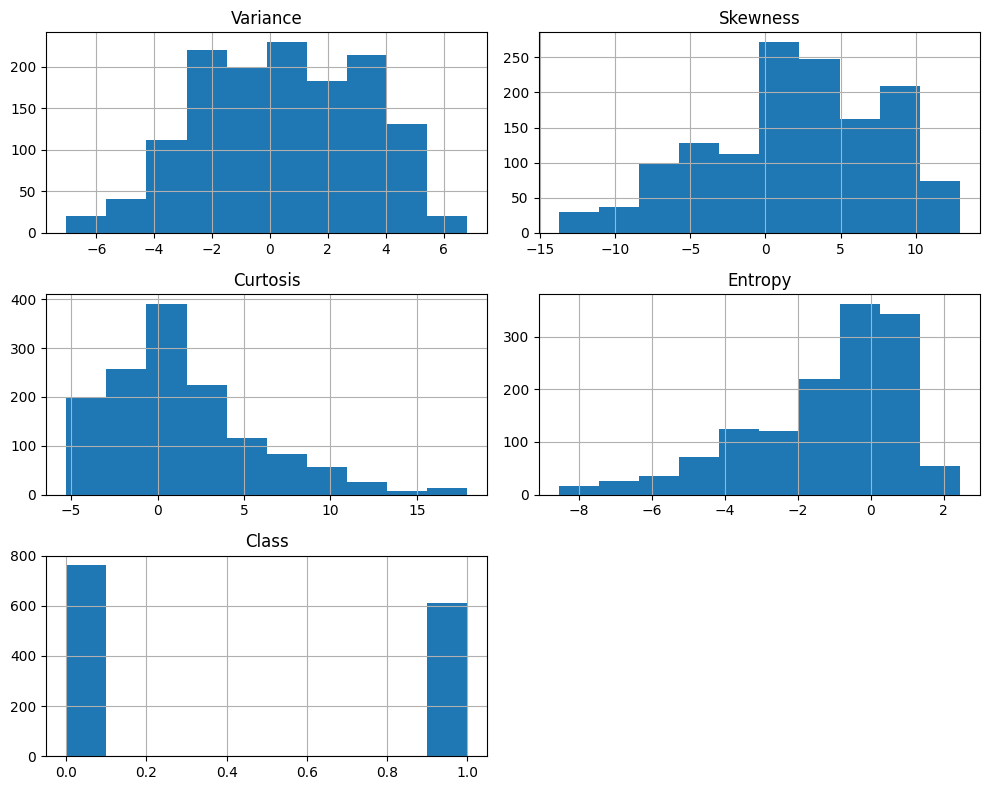

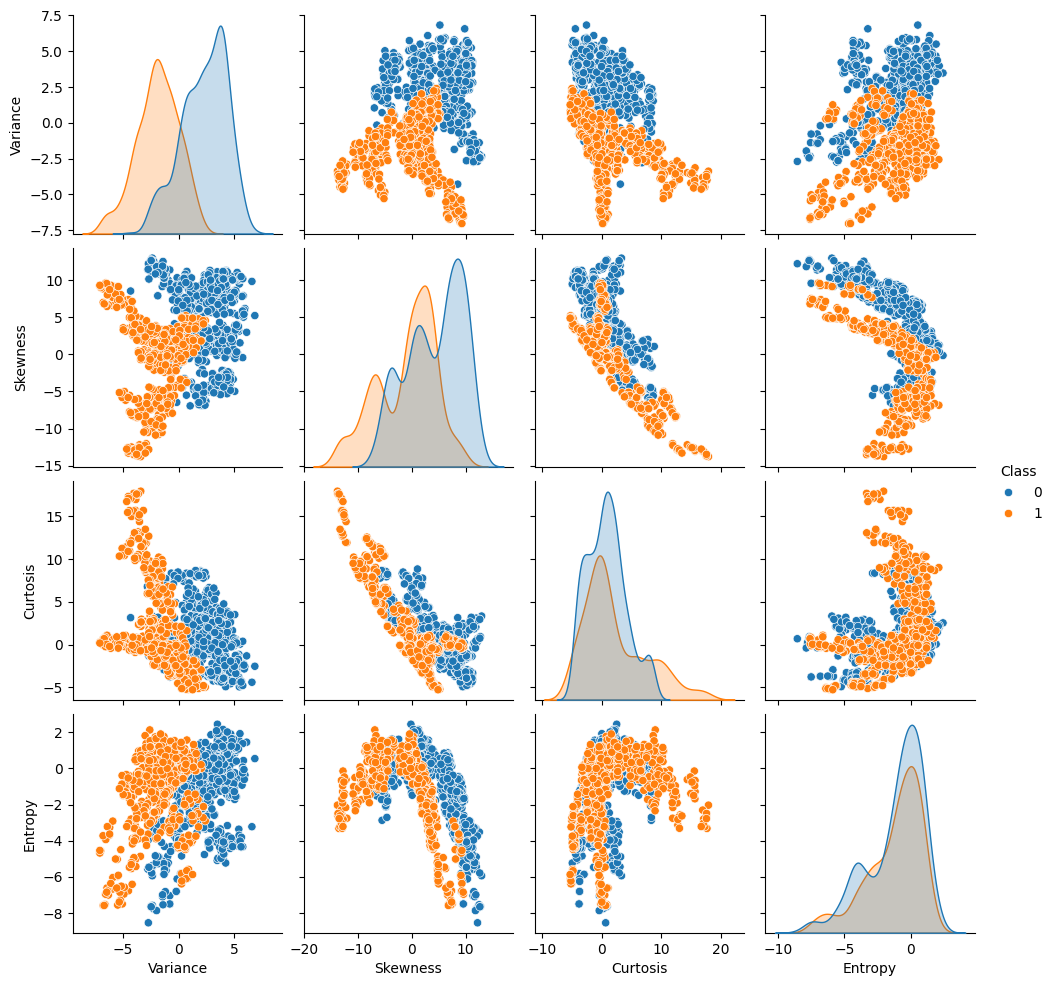

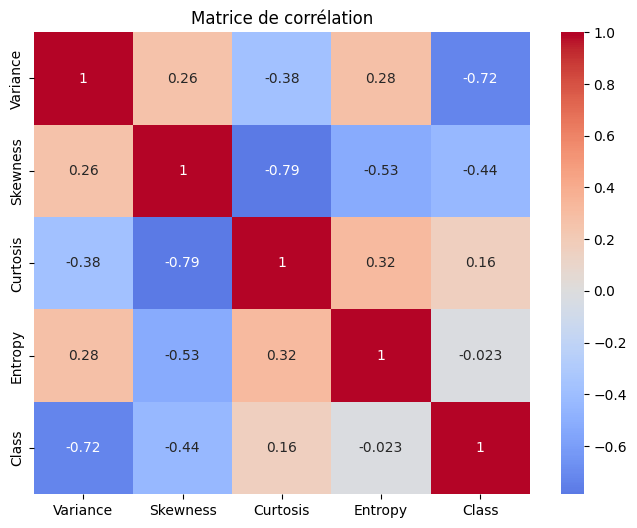


Performance du modèle linéaire:
Accuracy: 0.9854368932038835

Matrice de confusion:
[[224   5]
 [  1 182]]

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       229
           1       0.97      0.99      0.98       183

    accuracy                           0.99       412
   macro avg       0.98      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412


Performance du modèle polynomial:
Accuracy: 0.9902912621359223

Performance du modèle sigmoid:
Accuracy: 0.75
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gam

In [4]:

# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

## 1. Charger le fichier BilletsBanque.xls
# Note: Si vous avez des problèmes avec xls, essayez de convertir en csv ou utiliser pd.read_excel
df = pd.read_csv('BilletsBanque.xls')  # Supposons qu'on a converti en CSV pour faciliter

## 2. Afficher les premières lignes
print("Premières lignes du dataset:")
print(df.head())

## 3. Vérifier les valeurs manquantes
print("\nValeurs manquantes par colonne:")
print(df.isnull().sum())

## 4. Résumé statistique
print("\nRésumé statistique:")
print(df.describe())

## 5. Histogrammes des distributions
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

## 6. Pairplot coloré par classe
sns.pairplot(df, hue='Class', diag_kind='kde')
plt.show()

## 7. Matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation")
plt.show()

## 8. Séparation features (X) et cible (y)
X = df.drop('Class', axis=1)
y = df['Class']

## 9. Division train/test (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 10. Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 11. SVM avec noyau linéaire
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

## 12. Évaluation du modèle linéaire
y_pred_linear = svm_linear.predict(X_test_scaled)

print("\nPerformance du modèle linéaire:")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred_linear))
print("\nRapport de classification:")
print(classification_report(y_test, y_pred_linear))

## 13. Question: La séparation linéaire suffit-elle?
# À analyser en fonction des résultats obtenus

## 14. Essai avec d'autres noyaux
# Noyau polynomial
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train_scaled, y_train)
y_pred_poly = svm_poly.predict(X_test_scaled)

print("\nPerformance du modèle polynomial:")
print("Accuracy:", accuracy_score(y_test, y_pred_poly))

# Noyau sigmoid
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train_scaled, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test_scaled)

print("\nPerformance du modèle sigmoid:")
print("Accuracy:", accuracy_score(y_test, y_pred_sigmoid))

## 15. SVM avec noyau RBF et recherche des meilleurs paramètres
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train_scaled, y_train)

## 16. Meilleurs paramètres
print("\nMeilleurs paramètres trouvés:")
print(grid_search.best_params_)

## 17. Comparaison des modèles
# Modèle RBF avec meilleurs paramètres
best_svm = grid_search.best_estimator_
y_pred_rbf = best_svm.predict(X_test_scaled)

print("\nPerformance du modèle RBF optimisé:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred_rbf))
print("\nRapport de classification:")
print(classification_report(y_test, y_pred_rbf))

# Comparaison des accuracy
print("\nComparaison des accuracy:")
print(f"Linéaire: {accuracy_score(y_test, y_pred_linear):.4f}")
print(f"Polynomial: {accuracy_score(y_test, y_pred_poly):.4f}")
print(f"Sigmoid: {accuracy_score(y_test, y_pred_sigmoid):.4f}")
print(f"RBF optimisé: {accuracy_score(y_test, y_pred_rbf):.4f}")